In [13]:
import numpy as np
from matplotlib import pyplot as plt

# make plots bigger
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14.0

# Thresholds and breakpoints (May '77)

We will be introducing you to a bit of modelling and subsequent data analysis in Python, by reproducing some of the results found in the review article by May (Nature v. 269, p. 471-477, 1977, [doi:10.1038/269471a0](https://www.nature.com/articles/269471a0)). This paper describes bifurcation in population models of the spruce budworm  using this differential equation:

$$\frac{{\rm d} N}{{\rm d} t} = r N \left(1 - \frac{N}{K}\right) - \frac{cN^2}{H^2 + N^2},$$

where $r$ is the intrinsic growth rate, $K$ is the carrying capacity (related to the average leaf area), $H$ is the characteristic budworm population (at which predation is saturated) and $c$ is the level of predation.

To show some of the capabilities of `matplotlib`, we'll reproduce (sort of) Figures 5 and 6 from May77.

Let us first write down  the differential equation in a form that Python understands:

In [14]:
# insert a definition for budworm_ode() here

def budworm_ode(N, t, predation, growth_rate, carrying_capacity, characteristic_population):
    r = growth_rate
    K = carrying_capacity
    c = predation
    H = characteristic_population
    return r*N * (1 - N/K) - c*N**2 / (H**2 + N**2)

Later on, we will be integrating this equation while varying the predation. For the moment let us see how this function behaves for different values of predation. We may give the values of the other arguments in the form of a dictionary. We chose some values that should be reasonable.

In [15]:
settings = {
    'growth_rate': 1.0,
    'carrying_capacity': 10,
    'predation': 2.0,
    'characteristic_population': 1.0
}

> ### Note: tuple unpacking, keyword arguments and dictionary unpacking
> We will apply these values to the function ``dNdT(...)`` by using keyword-argument expansion.
> 
> ```python
> dNdt(N, 0, **settings)
> ```
>
> with the current value of ``settings`` is like saying
>
> ```python
> dNdt(N, 0, predation=2.0, growth_rate=1.0, carrying_capacity=10,
>      characteristic_population=1.0)
> ```

## Plotting
We'll create some plots to study the behaviour of this model.

In [16]:
# Generate an array of 100 numbers in the range of [0.0-8.0] (inclusive)
N = np.linspace(0, 8, 161)
N

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

In [17]:
dN = budworm_ode(N, 0, **settings)

> ### Note: vectorized functions
> In making these plots, our function `dNdt` was applied to a whole array of values. First we defined a series of values for `N`
> ```python
> N = np.linspace(0, 8, 81)
> ```
> Then, we applied `dNdt`
> ```python
> dN = budworm_ode(N, 0, **settings)
> ```
> We could do this because all the things we do in the body of `dNdt` are valid on both plain numbers and `numpy` arrays. We will call functions that work on numbers as well as arrays *vectorized functions*.
>
> Whenever possible, when doing numerical calculations in Python, make sure to use vectorized functions. The alternative is to write for-loops, which is much much *slower*. Later on we will see an example of a function that is less easy to vectorize.

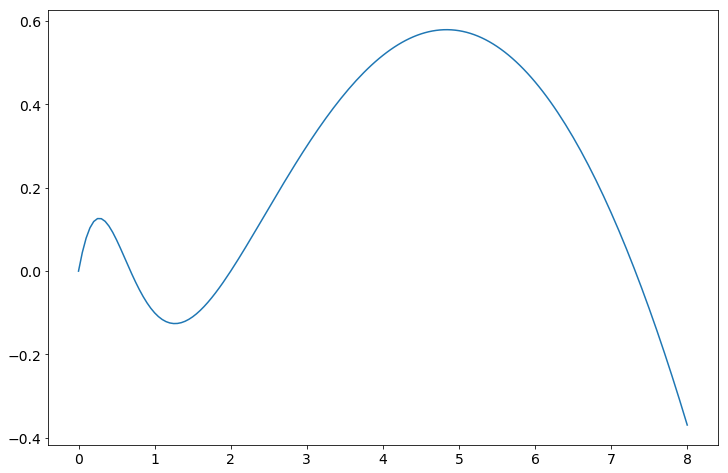

In [18]:
plt.plot(N, dN) # but we'd like to set labels and add a legend

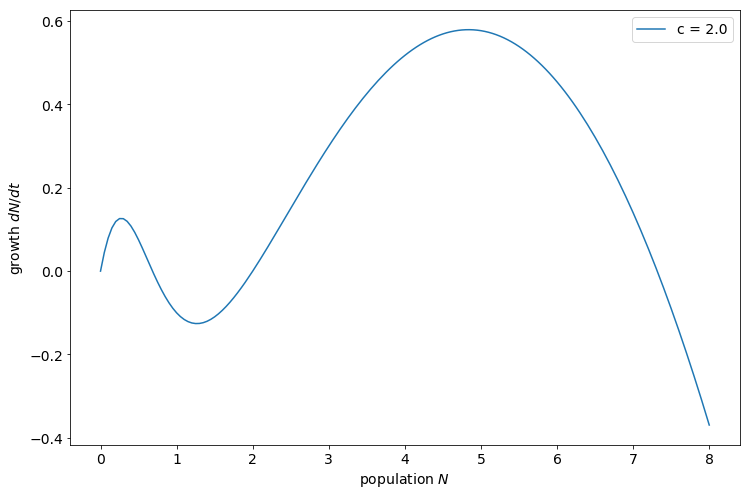

In [19]:
fig = plt.subplot(111)
fig.plot(N, dN, label='c = {}'.format(settings['predation']))
fig.set_xlabel('population $N$')
fig.set_ylabel('growth $dN/dt$')
fig.legend()
plt.show()

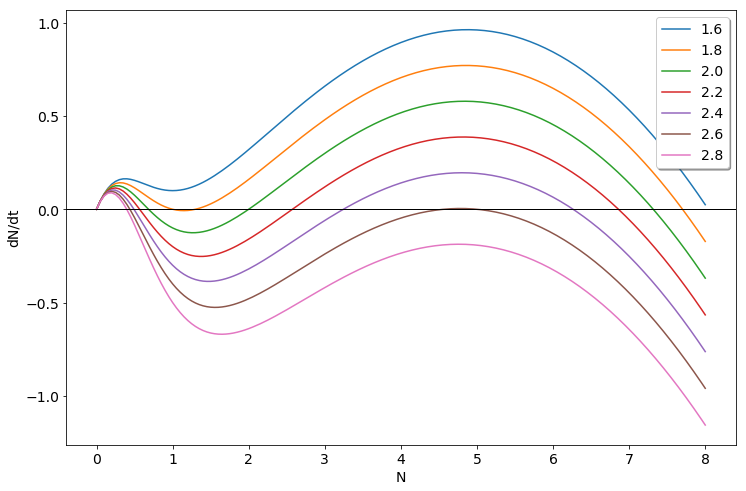

In [20]:
fig = plt.subplot(111)  # obtain a figure object

for c in np.linspace(1.6, 2.8, 7):  # Loop over several values for `c`
    settings.update(predation=c)    # change only the value of 'predation' in `settings`
    dN = budworm_ode(N, 0, **settings)         # apply our function for dN/dt
    fig.plot(N, dN, label='{:.03}'.format(c))  # plot

fig.axhline(0.0, c='k', linewidth=1)        # add a line on y == 0.0
fig.legend(loc='upper right', shadow=True)  # add a legend
fig.set_xlabel('N')                         # set labels
fig.set_ylabel('dN/dt')

# save figure when you're happy!
plt.savefig('figures/model-diff.svg')

plt.show()

Interesting things happen when derivatives vanish. Where lines cross the x-axis upward, we find unstable equilibria, and similarly, downward crossing gives a stable equilibrium. This plot tells us to expect interesting things (i.e. bifurcation) near $c=1.8$ and $c=2.6$. For those values the vanishing first derivative coinside with vanishing second derivative.

We can tell more about the situation at these special points by making a contour plot of ${\rm d}N/{\rm d}t$ with varying $N$ and $c$. To make matters easier we can get an analytic expression for the roots
$$\frac{dN}{dt} = 0,$$
which is solved by
$$N = 0$$
and
$$c = r\left(\frac{H^2}{N} - \frac{H^2}{K} + N - \frac{N^2}{K}\right).$$
This expression implicitely tells us what the equilibrium values for $N$ are, given $c$.
To find the tipping point values for $c$, we should see where the derivatives vanish, giving
$$\frac{{\rm d} c}{{\rm d} N} = r\left(-\frac{2}{K} N^3 + N^2 - H^2\right) = 0.$$
This cubic polynomial can be solved using Cardano's formula ([for reference, see Wikipedia](https://en.wikipedia.org/wiki/Cubic_function#General_solution_to_the_cubic_equation_with_real_coefficients)). This function is included in this distribution.

In [21]:
from cubic import cubic_roots
help(cubic_roots)

Help on function cubic_roots in module cubic.cardano:

cubic_roots(a, b, c, d)
    Compute the roots of the cubic polynomial :math:`ax^3 + bx^2 + cx + d`.
    
    :param a: cubic coefficient
    :param b: quadratic coefficient
    :param c: linear coefficient
    :param d: constant
    :return: list of three complex roots
    
    This function does not check if the found roots are real or complex.



In [22]:
r = settings['growth_rate']
H = settings['characteristic_population']
K = settings['carrying_capacity']

def critical_predation(N, r, H, K):
    return r*(H**2/N + N - H**2/K - N**2/K)

def critical_N(r, H, K):
    return cubic_roots(-2/K, 1, 0, -H**2)

N_critical = np.sort(np.array(
    [e.real for e in critical_N(r, H, K)]))

print("critical N:        ", N_critical)
print("critical predation:", critical_predation(N_critical, r, H, K))

critical N:         [-0.919089   1.1378052  4.7812838]
critical predation: [-2.19159537  1.7872302   2.60436517]


The negative values are not *real* in the physical sense of the model, so we'll ignore them. The values we find for $c = 1.787$ and $c = 2.604$ do match our expectations. 

> ### Note: list comprehensions
> This last bit of code contains a list comprehension. In general a list comprehension looks like:
> ```python
> result = [<expression> for <variable> in <collection>]
> ```
> You could (but shouldn't!) do the same doing:
> ```python
> result = []
> for <variable> in <collection>:
>     result.append(<expression>)
> ```
> In general the latter will result in slower code, and it is considered bad style. If the code in `<expression>` becomes too involved for a one-line expression, it is better to put it in a separate function.
>
> Python has similar forms to construct dictionaries and sets.

We're now ready to combine all this information into a diagram, similar to Fig. 6 in May77. This plotting example is a bit more involved. Making nice plots can involve quite a bit of tweaking!

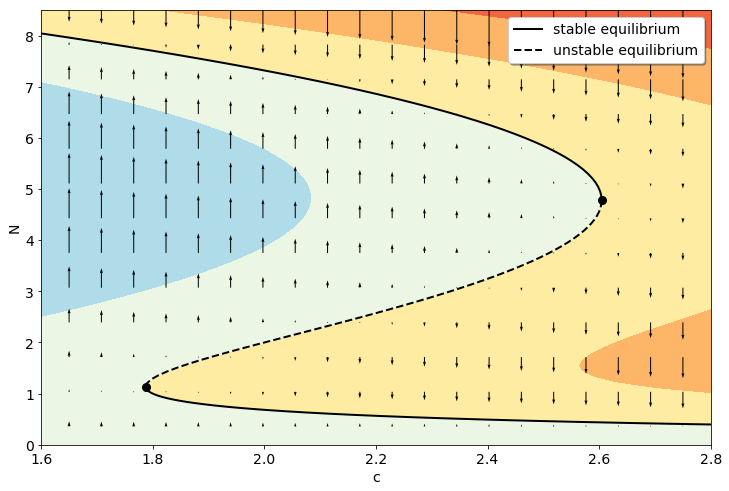

In [23]:
fig = plt.subplot(111)

# add contour plot
N_cntr = np.linspace(-1, 10, 100)
c_cntr = np.linspace(1.6, 2.8, 100)
dN_cntr = budworm_ode(N_cntr[:,None], 0, c_cntr[None,:], r, K, H)
fig.contourf(c_cntr, N_cntr, dN_cntr, levels=np.linspace(-2, 2, 9), cmap='RdYlBu')

# emphasize the 0-contour and tipping points
N1 = np.linspace(0.01, N_critical[1], 50)
N2 = np.linspace(N_critical[1], N_critical[2], 50)
N3 = np.linspace(N_critical[2], 9.0, 50)
fig.plot(critical_predation(N1, r, H, K), N1, linewidth=2, c='k', label='stable equilibrium')
fig.plot(critical_predation(N2, r, H, K), N2, linewidth=2, c='k', ls='dashed', label='unstable equilibrium')
fig.plot(critical_predation(N3, r, H, K), N3, linewidth=2, c='k')
fig.plot(critical_predation(N_critical, r, H, K), N_critical, 'o', ms=8, c='k')

# add quivers
quiver_mesh = np.meshgrid(
    np.linspace(1.65, 2.75, 20),
    np.linspace(-1, 8.5, 15))
N_q = quiver_mesh[1]
c_q = quiver_mesh[0]
quiver_dN = budworm_ode(N_q, 0, c_q, r, K, H)
fig.quiver(c_q, N_q, 0, quiver_dN, width=0.0015, scale=20)

# decoration
fig.set_xlabel('c')
fig.set_ylabel('N')
fig.set_ylim(0, 8.5)
fig.set_xlim(1.6, 2.8)
fig.legend(loc='upper right', shadow=True)

plt.savefig('figures/catastrophe_diagram.svg')
plt.show()